In [596]:
import numpy as np

In [597]:
!python --version

Python 3.11.5


In [598]:
#demo for evaluation
#https://gtuckerkellogg.github.io/pairwise/demo/

In [599]:
""" 
F(i, j) = max(
            F(i - 1, j - 1) + s(xi, yj),
            maxk=0…i-1F(k, j) - γ(i - k),
            maxk=0…j-1F(i, k) - γ(j - k),
            0)   

"""

' \nF(i, j) = max(\n            F(i - 1, j - 1) + s(xi, yj),\n            maxk=0…i-1F(k, j) - γ(i - k),\n            maxk=0…j-1F(i, k) - γ(j - k),\n            0)   \n\n'

In [600]:
scores = {
    "match" : 3,
    "mismatch" : -3,
    "gap": 2
}

top_sequence = "TGTTACGG"
bottom_sequence = "GGTTGACTA"


def s(xi,xj):
    return scores["match"] if xi == xj else scores["mismatch"]

def match_mismatch(i,j, xi, xj, matrix):
    return matrix[i-1,j-1] + s(xi, xj)

#maxk=0…i-1F(k, j) - γ(i - k)
def γ(n):
    return n * scores["gap"]

def row_gaps_score(i,j):
    gap_scores = []
    for k in range((i)):
        gap_score = matrix[k,j] - γ(i-k)
        gap_scores.append(gap_score)
    
    max_score = np.max(gap_scores)
    kth_rows = tuple([k for k,value in enumerate(gap_scores) if value==max_score])
    #print(kth_rows)
    return max_score, kth_rows

#maxk=0…j-1F(i, k) - γ(j - k),
def col_gaps_score(i,j):
    gap_scores = []
    for k in range((j)):
        gap_score = matrix[i,k] - γ(j-k)
        gap_scores.append(gap_score)

    max_score = np.max(gap_scores)
    kth_cols = tuple([k for k,value in enumerate(gap_scores) if value==max_score])
    #print(kth_cols)
    return max_score, kth_cols


n_rows = len(bottom_sequence)+1
n_cols = len(top_sequence)+1

matrix = np.zeros((n_rows, n_cols))
traceback_dic = {}

for i in range(1,n_rows):
    for j in range(1,n_cols):
        #print(f"i: {i}, j: {j}")
        xi = bottom_sequence[i-1]
        xj = top_sequence[j-1]
        score1 = match_mismatch(i,j, xi, xj, matrix)
        score2, kth_rows = row_gaps_score(i,j)
        score3, kth_cols = col_gaps_score(i,j)
        top_score = max(score1, 
                        score2, 
                        score3, 
                        0)
        
        matrix[i,j] = top_score

        top_idx = [t for t, value in enumerate([score1, score2, score3]) if value == top_score]
        traceback_dic[f"{i},{j}"] = []
        for idx in top_idx:
            #print(f"i,j: {i},{j}: ",end=" ")
            #print(traceback_dic[f"{i},{j}"])
            if top_score > 0:
                if idx == 0:
                    traceback_dic[f"{i},{j}"].append((i-1,j-1))
                elif idx == 1:
                    for k in kth_rows:
                        traceback_dic[f"{i},{j}"].append((k,j))
                elif idx == 2:
                    for k in kth_cols:
                        traceback_dic[f"{i},{j}"].append((i,k))                

traceback_dic

{'1,1': [],
 '1,2': [(0, 1)],
 '1,3': [(1, 2)],
 '1,4': [],
 '1,5': [],
 '1,6': [],
 '1,7': [(0, 6)],
 '1,8': [(0, 7)],
 '2,1': [],
 '2,2': [(1, 1)],
 '2,3': [(2, 2)],
 '2,4': [],
 '2,5': [],
 '2,6': [],
 '2,7': [(1, 6)],
 '2,8': [(1, 7)],
 '3,1': [(2, 0)],
 '3,2': [(2, 2), (3, 1)],
 '3,3': [(2, 2)],
 '3,4': [(2, 3), (3, 3)],
 '3,5': [(3, 3), (3, 4)],
 '3,6': [],
 '3,7': [(2, 7)],
 '3,8': [(2, 8)],
 '4,1': [(3, 0)],
 '4,2': [(4, 1)],
 '4,3': [(3, 2), (3, 3)],
 '4,4': [(3, 3)],
 '4,5': [(4, 4)],
 '4,6': [(4, 4), (4, 5)],
 '4,7': [(4, 4), (4, 5), (4, 6)],
 '4,8': [(2, 8), (3, 8)],
 '5,1': [(4, 1)],
 '5,2': [(4, 1)],
 '5,3': [(5, 2)],
 '5,4': [(4, 4)],
 '5,5': [(4, 4)],
 '5,6': [(4, 5), (5, 5)],
 '5,7': [(4, 6)],
 '5,8': [(4, 7), (5, 7)],
 '6,1': [],
 '6,2': [(5, 2)],
 '6,3': [(5, 2)],
 '6,4': [(4, 4), (5, 4)],
 '6,5': [(5, 4)],
 '6,6': [(6, 5)],
 '6,7': [(5, 7), (6, 5), (6, 6)],
 '6,8': [(5, 7)],
 '7,1': [],
 '7,2': [(5, 2), (6, 2)],
 '7,3': [(6, 2), (6, 3)],
 '7,4': [(4, 4), (5, 4), (6,

In [601]:
def recursive_traceback(matrix, traceback_dic, traceback_paths, i,j, i0,j0):
    while matrix[i0,j0] > 0:
        i0,j0 = traceback_dic[f"{i0},{j0}"][0] #fetches the first element, prioritizes diagonal > up > left
        traceback_paths[f"{i},{j}"].append((i0,j0))

In [602]:
sorted_score_set = np.sort(list(set(matrix.flatten())))[::-1]

In [603]:
np.sort(matrix.flatten())[::-1]

array([13., 11., 11., 10., 10.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,
        7.,  7.,  7.,  7.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  5.,
        5.,  5.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [604]:
sorted_score_set = np.sort(list(set(matrix.flatten())))[::-1]
best_score = sorted_score_set[0]
second_best_score = sorted_score_set[1]
max_indices = np.argwhere(matrix == best_score)
max_indices
traceback_paths = {}
for idx_pair in max_indices:
    i,j = idx_pair
    traceback_paths[f"{i},{j}"] = []
    #traceback_paths[f"{i},{j}"].append((i,j))
    
    recursive_traceback(matrix, traceback_dic, traceback_paths, i,j, i0=i,j0=j)

In [605]:
traceback_paths

{'7,6': [(6, 5), (5, 4), (4, 4), (3, 3), (2, 2), (1, 1)]}

In [613]:
len(list(traceback_paths.keys()))

1

In [610]:
for num, key in enumerate(traceback_paths):
    i,j = key.split(",")
    i,j = int(i),int(j)
    top_seq = ""
    bot_seq = ""
    top_sequence_add = " " + top_sequence
    bottom_sequence_add = " " + bottom_sequence

    #print(top_sequence)
    #print(bottom_sequence)

    for it, idx_pair in enumerate(traceback_paths[f"{i},{j}"]):
        #print(it, idx_pair)
        i_new,j_new = idx_pair

        if it==0:
            i_old, j_old = i, j

        diff_top = j_old - j_new
        diff_bot = i_old - i_new
        #print(it, diff_bot, diff_top, i_new, j_new, i_old, j_old)
        #print(top_seq)
        #print(bot_seq)
        #test = (not top_sequence_add[j_old] == " ") and (not bottom_sequence_add[j_old] == " ") #and (not matrix[i_new, j_new] == 0)
        test = True
        if diff_top == diff_bot == 1:
            top_seq += top_sequence_add[j_old]
            bot_seq += bottom_sequence_add[i_old]
        elif diff_top >= 1 and diff_bot == 0:
            top_seq += (diff_top-1) * "-" + top_sequence_add[j_old] 
            bot_seq += diff_top * "-"
        elif diff_top == 0 and diff_bot >=1:
            #print("yes")
            top_seq += diff_bot * "-"
            bot_seq += (diff_bot-1) * "-" + bottom_sequence_add[i_old]
        else:
            #print(it, diff_top)
            #print(it, diff_bot)
            print(it)
            
        i_old, j_old = idx_pair

        #print(top_seq)
        #print(bot_seq)
            
    print(f"max_score: {best_score}")
    print(f"alignment_length: {len(top_seq[::-1])}")
    print(top_seq[::-1])
    print(bot_seq[::-1])
    print("")

    n_match = 0
    n_mismatch = 0
    n_gaps = 0

    for i,j in zip(top_seq, bot_seq):
        if i==j:
            n_match +=1
        elif i!=j:
            if i == "-" or j == "-":
                n_gaps +=1
            else:
                n_mismatch +=1
    print(n_match, n_mismatch, n_gaps)

max_score: 13.0
alignment_length: 6
GTT-AC
GTTGAC

5 0 1


In [607]:
traceback_paths

{'7,6': [(6, 5), (5, 4), (4, 4), (3, 3), (2, 2), (1, 1)]}

In [608]:
import pandas as pd

# Define the shape of the matrix
rows, cols = n_rows, n_cols

# Create the matrix with the specified entries
visual_matrix = [[f"({row},{col})" for col in range(cols)] for row in range(rows)]

# Convert to a pandas DataFrame
matrix_df = pd.DataFrame(visual_matrix)
from IPython.display import display
# Display the DataFrame
display(pd.DataFrame(matrix_df))


,0,1,2,3,4,5,6,7,8
0,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(0,6)","(0,7)","(0,8)"
1,"(1,0)","(1,1)","(1,2)","(1,3)","(1,4)","(1,5)","(1,6)","(1,7)","(1,8)"
2,"(2,0)","(2,1)","(2,2)","(2,3)","(2,4)","(2,5)","(2,6)","(2,7)","(2,8)"
3,"(3,0)","(3,1)","(3,2)","(3,3)","(3,4)","(3,5)","(3,6)","(3,7)","(3,8)"
4,"(4,0)","(4,1)","(4,2)","(4,3)","(4,4)","(4,5)","(4,6)","(4,7)","(4,8)"
5,"(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)","(5,6)","(5,7)","(5,8)"
6,"(6,0)","(6,1)","(6,2)","(6,3)","(6,4)","(6,5)","(6,6)","(6,7)","(6,8)"
7,"(7,0)","(7,1)","(7,2)","(7,3)","(7,4)","(7,5)","(7,6)","(7,7)","(7,8)"
8,"(8,0)","(8,1)","(8,2)","(8,3)","(8,4)","(8,5)","(8,6)","(8,7)","(8,8)"
9,"(9,0)","(9,1)","(9,2)","(9,3)","(9,4)","(9,5)","(9,6)","(9,7)","(9,8)"


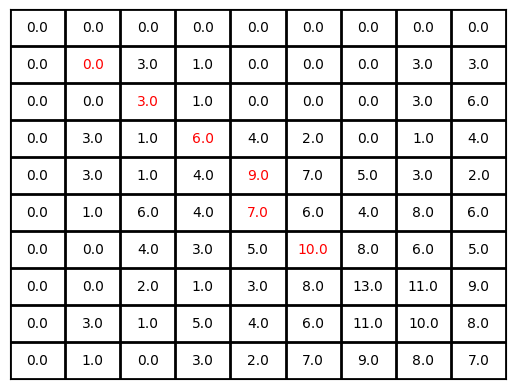

In [609]:
import numpy as np
import matplotlib.pyplot as plt



# Example matrix
for idx_pair in max_indices:
    i,j = idx_pair
    # List of 2D coordinates to color in red
    coordinates = traceback_paths[f"{i},{j}"]

            
    # Plotting the matrix
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(matrix.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(matrix.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)

    # Adding text for each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            color = 'red' if (i, j) in coordinates else 'black'
            ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color=color)

    # Hide the major ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Invert the y-axis to have the origin at the top left
    plt.gca().invert_yaxis()

    plt.show()

